In [ ]:
#from google.colab import drive
#drive.mount ("/content/drive/")
#path="drive/MyDrive/MultiMed/"

path="assets/"

Mounted at /content/drive/


In [ ]:
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
import numpy as np
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Read a text file. Tokenize the text contained in the file into words

Saves this data in a file called "w_tokens.txt" with one word each line

In [ ]:
# Open text file and extract contents to string
f = open(path+"friends_ep624.txt")
rawtext = f.read()
f.close()
# Tokenize string
w_tokens = np.array(word_tokenize(rawtext))

# Open text file and write tokens
f = open(path+"w_tokens.txt","w")
for token in w_tokens:
  f.write(token)
  f.write("\n")
f.close()

Generate a BoW for this corpus after removing non-words and stop-words from the list, sort them in descending order, and plot the 20 most frequently used words in the text file.

<function matplotlib.pyplot.show(close=None, block=None)>

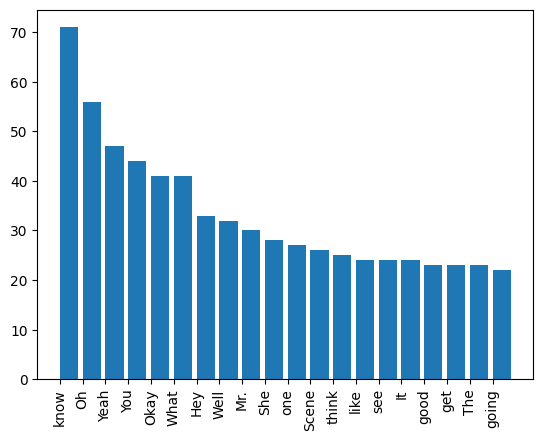

In [ ]:
matched_indices = []
# For all tokens
for tok in range(0,len(w_tokens)):
  # If word
  if re.search(r"\w",w_tokens[tok]):
    # Add index to list
    matched_indices.append(tok)
# Create new list
w_tokens2 = []
# Add word tokens to new list
for i in matched_indices:
  w_tokens2.append(w_tokens[i])

names = ["I","Monica", "Chandler", "Joey", "Richard", "Phoebe", "Ross", "Rachel", "n't", "'s", "'re", "'m", "na", "ca", "gon", "'ll"]
stpwd = stopwords.words("english")
matched_indices = []
# For all tokens
for tok in range(0,len(w_tokens2)):
  # If not stopword or name
  if w_tokens2[tok] not in stpwd and w_tokens2[tok] not in names:
    # Add index to list
      matched_indices.append(tok)

# Create new list
w_tokens3 = []
# Add non-stopword tokens to new list
for i in matched_indices:
  w_tokens3.append(w_tokens2[i])

# Extract and order unique words and their counts
unique, counts = np.unique(w_tokens3, return_counts=True)
order = np.flip(np.argsort(counts))
unique = unique[order]
counts = counts[order]

# Plot and display
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(unique[:20], counts[:20], align='edge')
plt.xticks(rotation=90)
plt.show

Save the entire ordered BoW into a file called "BoW.csv" which will have each word and its corresponding count/frequency separated by a comma on each line

In [ ]:
# Open text file and write tokens
f = open(path+"BoW.csv","w")
for i in range(0,len(unique)):
  f.write(unique[i])
  f.write(", ")
  f.write(str(counts[i]))
  f.write("\n")
f.close()

Tokenize the original corpus into sentences, save them as "s_tokens.txt" each sentence separated by dashed lines

In [ ]:
# Open text file and write tokens
from nltk import sent_tokenize
s_tokens = np.array(sent_tokenize(rawtext))
f = open(path+"s_tokens.txt","w")
for tok in s_tokens:
  f.write(tok)
  f.write("\n")
  f.write("======")
  f.write("\n")
f.close()

Extract the sentences that include the words in the 20 most frequently used words, and save these extracted sentences as "sentences_with_top20.txt" with dashed lines separating them as above.

In [ ]:
sent = []
# If top 20 word in sentence, add sentence to list
for tok in s_tokens:
  for word in unique[:20]:
    if word in tok:
      sent.append(tok)
# Remove duplicates from list
unique_s = list(dict.fromkeys(sent))

# Write tokens to file.
f = open(path+"sentences_with_top20.txt","w")
for tok in unique_s:
      f.write(tok)
      f.write("\n")
      f.write("======")
      f.write("\n")
f.close()